In [54]:
# importing required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble  import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [14]:
board_games = pd.read_csv("board_games.csv")
board_games.head()

,id,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,120677,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939
2,102794,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,12230,99,1476,5600,1700,777,3.7761
3,25613,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,14343,362,1084,5075,3378,1642,4.1590
4,3076,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,44362,795,861,5414,9173,5213,3.2943


In [15]:
# drop missing values
df = board_games.dropna(axis = 0, how = 'any')
df.drop(df[df['users_rated'] == 0].index, inplace = True)

C:\Users\Rajam\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFC6A31460>]],
      dtype=object)

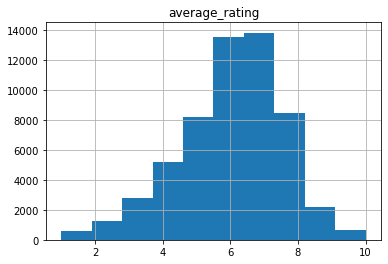

In [18]:
# Create a histogram of the average_rating column using the hist function
df.hist(column = 'average_rating')

In [19]:
# Calculate the standard deviation of the average_rating column and print it out
std = df.loc[:,"average_rating"].std()
print("Standard Deviation of the column Average_rating is",std)

Standard Deviation of the column Average_rating is 1.5788299348332662


In [20]:
# Calculate the mean of the average_rating column and print it out
mean = df.loc[:,"average_rating"].mean()
print("Mean of the column Average_rating is",mean)

Mean of the column Average_rating is 6.016112849333889


Think about what error metric might make sense for this data and write a markdown cell with your thoughts. 
List out the reason of picking this error and why?

From the plot, and the values of the mean and standard deviation, it is apparent that there are almost no outliers here.Hence, we would recommend using SSE or RMSE as error metric, as there are no significant outliers that might have an adverse effect on the fit of the model.

In [21]:
# Use the corr method on numeric_columns to compute correlations between columns. Assign the result to correlations 
cor = df.iloc[:,np.r_[3:18]].corr()
cor

,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
minplayers,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081
total_owners,0.014594,-0.000977,0.014532,0.008975,0.014532,0.118564,0.977664,0.137478,1.000000,0.829875,0.688380,0.788820,0.954026,0.938422,0.183341
total_traders,0.024708,-0.002381,0.019264,0.014484,0.019264,0.152313,0.807873,0.119452,0.829875,1.000000,0.555836,0.631443,0.856526,0.801559,0.227302


In [22]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

cor.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
minplayers,1.00,0.04,0.02,0.03,0.02,0.11,0.02,-0.03,0.01,0.02,-0.01,-0.00,0.02,0.02,-0.02
maxplayers,0.04,1.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01
playingtime,0.02,-0.00,1.00,0.97,1.00,0.05,0.01,0.05,0.01,0.02,0.02,0.02,0.02,0.02,0.09
minplaytime,0.03,-0.00,0.97,1.00,0.97,0.05,0.01,0.04,0.01,0.01,0.02,0.01,0.01,0.01,0.08
maxplaytime,0.02,-0.00,1.00,0.97,1.00,0.05,0.01,0.05,0.01,0.02,0.02,0.02,0.02,0.02,0.09
minage,0.11,0.00,0.05,0.05,0.05,1.00,0.10,0.21,0.12,0.15,0.15,0.14,0.11,0.10,0.26
users_rated,0.02,-0.00,0.01,0.01,0.01,0.10,1.00,0.11,0.98,0.81,0.70,0.81,0.98,0.98,0.15
average_rating,-0.03,-0.01,0.05,0.04,0.05,0.21,0.11,1.00,0.14,0.12,0.20,0.17,0.12,0.11,0.35
total_owners,0.01,-0.00,0.01,0.01,0.01,0.12,0.98,0.14,1.00,0.83,0.69,0.79,0.95,0.94,0.18
total_traders,0.02,-0.00,0.02,0.01,0.02,0.15,0.81,0.12,0.83,1.00,0.56,0.63,0.86,0.80,0.23


In [23]:
# Print out the average_rating column of correlations.
# This shows how much each column in numeric_columns are correlated with average_rating
df[df.columns[3:]].corr()['average_rating'][:]

minplayers       -0.032701
maxplayers       -0.008335
playingtime       0.048994
minplaytime       0.043985
maxplaytime       0.048994
minage            0.210049
users_rated       0.112564
average_rating    1.000000
total_owners      0.137478
total_traders     0.119452
total_wanters     0.196566
total_wishers     0.171375
total_comments    0.123714
total_weights     0.109691
average_weight    0.351081
Name: average_rating, dtype: float64

Do any of the correlations surprise you? Write up your thoughts in a markdown cell.
Figure out which columns, if any, you want to remove. 
Make Insights through correlation plots, what do you observe from data? 


From the above correlation details, we can see that columns minplayers, maxplayers, playingtime, minplaytime, maxplaytime have negative to zero correlation with our predictor average_rating. Removing these columns will not impact our regression model.
Also, an interesting point to note is that there is a correlation of 0.35 between average rating and average weight. Perhaps, the more people feel "involved" in a game, the higher the rating is.

## Model Fitting

In [56]:
board_games = df.copy()

In [57]:
bg = board_games.drop(["id","name","yearpublished","minplayers","maxplayers","playingtime","minplaytime","maxplaytime"],axis = 1)
bg.head()

,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939
2,12.0,9262,8.28994,12230,99,1476,5600,1700,777,3.7761
3,12.0,13294,8.20407,14343,362,1084,5075,3378,1642,4.1590
4,12.0,39883,8.14261,44362,795,861,5414,9173,5213,3.2943


In [58]:
bg_y = bg.pop("average_rating")
bg_x = bg


In [59]:
# Predicting without K-fold
X_train,X_test,Y_train,Y_test = train_test_split(bg_x,bg_y,test_size = 0.3,random_state = 2120)


In [60]:
X_train.head()

,minage,users_rated,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
71080,12.0,1,5,0,18,114,16,1,2.0000
32025,12.0,1,5,0,1,2,1,1,2.0000
78810,10.0,5,4,0,0,28,4,0,0.0000
1971,8.0,9914,14122,305,649,2507,2808,722,1.7175
49087,0.0,2,1,0,0,0,0,0,0.0000


In [29]:
Y_train.head()

71080    8.00000
32025    5.00000
78810    8.25400
1971     7.35316
49087    3.75000
Name: average_rating, dtype: float64

In [30]:
scaler = StandardScaler()

In [31]:
#OLS Model using Statsmethods.api.OLS()
X_train_sm = scaler.fit_transform(X_train)
X_train_sm = sm.add_constant(X_train_sm)
X_test_sm = scaler.transform(X_test)
X_test_sm = sm.add_constant(X_test_sm)
reg = sm.OLS(Y_train,X_train_sm)
reg = reg.fit()
preds = reg.predict(X_test_sm)

In [32]:
rmse = mean_squared_error(Y_test,preds,squared = False)
rmse

1.4438609413752572

In [33]:
# SGD Regressor
sgdscaler = StandardScaler()
sgdreg = SGDRegressor(random_state = 2120)
X_train_scaled = sgdscaler.fit_transform(X_train)
X_test_scaled = sgdscaler.transform(X_test)

sgdreg.fit(X_train_scaled,Y_train)
sgdpred = sgdreg.predict(X_test_scaled)


In [34]:
sgdrmse = mean_squared_error(Y_test,sgdpred,squared = False)
sgdrmse

1.445195013761181

As can be seen, similar error is observed using ordinary OLS regressor model and the SGD model.

In [35]:
# K-fold Cross Validation OLS regressor
kf = KFold(n_splits = 5)
scaler = StandardScaler()
for train_index, test_index in kf.split(bg_x):
    # Split train-test
    X_train, X_test = bg_x.iloc[train_index], bg_x.iloc[test_index]
    y_train, y_test = bg_y.iloc[train_index], bg_y.iloc[test_index]
    X_train_sm = scaler.fit_transform(X_train)
    X_train_sm = sm.add_constant(X_train_sm)
    X_test_sm = scaler.transform(X_test)
    X_test_sm = sm.add_constant(X_test_sm)
    # Train the model
    reg = sm.OLS(y_train,X_train_sm)
    reg = reg.fit()
    preds = reg.predict(X_test_sm)
    print(mean_squared_error(y_test,preds,squared = False))


1.943102510909835
1.518120177659392
1.5876190019654053
1.5839784536230432
1.9625911355187877


It seems that the cross validation is yielding slightly worse results than the individual model. 

In [36]:
# K-fold Cross Validation SGD Regressor
kf = KFold(n_splits=5)
scaler = StandardScaler()
sgdreg = SGDRegressor(random_state = 2120)

for train_index, test_index in kf.split(bg_x):
    # Split train-test
    X_train, X_test = bg_x.iloc[train_index], bg_x.iloc[test_index]
    y_train, y_test = bg_y.iloc[train_index], bg_y.iloc[test_index]
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Train the model
    sgdreg = sgdreg.fit(X_train,y_train)
    preds = sgdreg.predict(X_test)
    print(mean_squared_error(y_test,preds,squared = False))



2.8418359809479896
1.5144177559282934
1.583660729660144
1.5816503060986782
1.9648319521814361


Similar to the OLS regressor, the SGD regressor seems to give slightly worse results than the individual model.

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(bg_x,bg_y,test_size = 0.3,random_state = 2120)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    

In [38]:
def sgdreg(lr,tol):
    model = SGDRegressor(tol = tol,learning_rate = 'constant',eta0 = lr)
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    print("For Learning Rate =",lr, "and tol =",tol,"rmse =",mean_squared_error(Y_test,pred,squared = False))
    

In [50]:
learning_rate = [0.1,0.01,0.001]
tolrence_rate = [0.1,0.05,0.01]
for lr_ in learning_rate:
    for tol_ in tolrence_rate:
        sgdreg(lr_,tol_) 

For Learning Rate = 0.1 and tol = 0.1 rmse = 269677873365.63306
For Learning Rate = 0.1 and tol = 0.05 rmse = 707555275574.2673
For Learning Rate = 0.1 and tol = 0.01 rmse = 3177114798657.6284
For Learning Rate = 0.01 and tol = 0.1 rmse = 6507266105.9816065
For Learning Rate = 0.01 and tol = 0.05 rmse = 22783069935.69053
For Learning Rate = 0.01 and tol = 0.01 rmse = 9535714667.46851
For Learning Rate = 0.001 and tol = 0.1 rmse = 1.4476038974097503
For Learning Rate = 0.001 and tol = 0.05 rmse = 1.4640043109917615
For Learning Rate = 0.001 and tol = 0.01 rmse = 1.4451711334332318


It might be that that when the step size is larger, the model is converging at a local minima instead of the global minima, as can be observed when the step size is smaller. With this, it is clear that even though the model may converge faster with a larger step size, it will not necessarily be better.

In [43]:
# LassoCV
model = LassoCV(cv = 5,random_state = 2120)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(mean_squared_error(Y_test,pred,squared = False))


1.4437063187654602


In [44]:
# RidgeCV
model = RidgeCV(cv = 5)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(mean_squared_error(Y_test,pred,squared = False))

1.4438180355417702


As can be observed, Lasso performs slightly better than Ridge. We do not feel there is much difference between the 2 to make a clear distinction, but looking purely at the result, we would prefer to use Lasso over Ridge.

In [74]:
#Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
forreg=regressor.fit(X_train,Y_train)
forprediction=forreg.predict(X_test)
print(mean_squared_error(Y_test,forprediction,squared = False))

1.4125084048279413


In [71]:
#Neural Networks
NNregr = MLPRegressor(random_state=4, max_iter=500,hidden_layer_sizes=1)
neureg=NNregr.fit(X_train,Y_train)
neupredict=neureg.predict(X_test)
print(mean_squared_error(Y_test,neupredict,squared = False))

1.5710631811726616


In [ ]:
As we can see Random Forest Regssor performs better than Neural Networks with single hidden layer. 